In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import sim.fitting
import sim.importing
import sim.log_similarity
import sim.replay_tracking
import sim.viz
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
plt.rcParams.update({'figure.autolayout': True})
#plt.style.use('seaborn-pastel')
sns.set_context('notebook')
sns.set_style('darkgrid')

In [31]:
log, petrinet_model = sim.importing.load_input('sim/testruns/goto.xes')

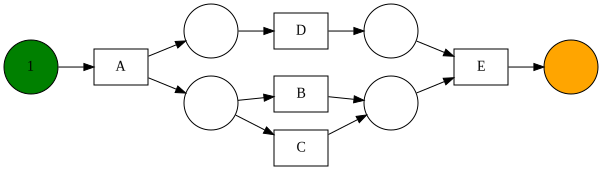

In [32]:
pn = sim.viz.visualize_petrinet(petrinet_model)
pn

In [33]:
simulation_graph, replay_data = sim.fitting.pre_process_input(log, petrinet_model)

In [34]:
gr = sim.viz.visualize_sim_graph(simulation_graph)

In [35]:
(hyper_parameters, model_configuration, simulated_log), score, score_list, individual_score_lists = sim.fitting.fit_preprocessed(log, petrinet_model, simulation_graph, replay_data, old=False)

Selecting modeling assumptions ModelingAssumptions(activity_assumptions={'A': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'B': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'C': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'D': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'E': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2))}, resource_assumptions={'R1': ResourceAssumptions(), 'R2': ResourceAssumptions(), 'System': ResourceAssumptions()}, load_factor=1.0)
cached_processing_guesses {'A': Timedelta('0 days 00:00:00'), 'B': Timedelta('1 days 20:07:24'), 'C': Timedelta('2 days 16:18:48'), 'D': Tim

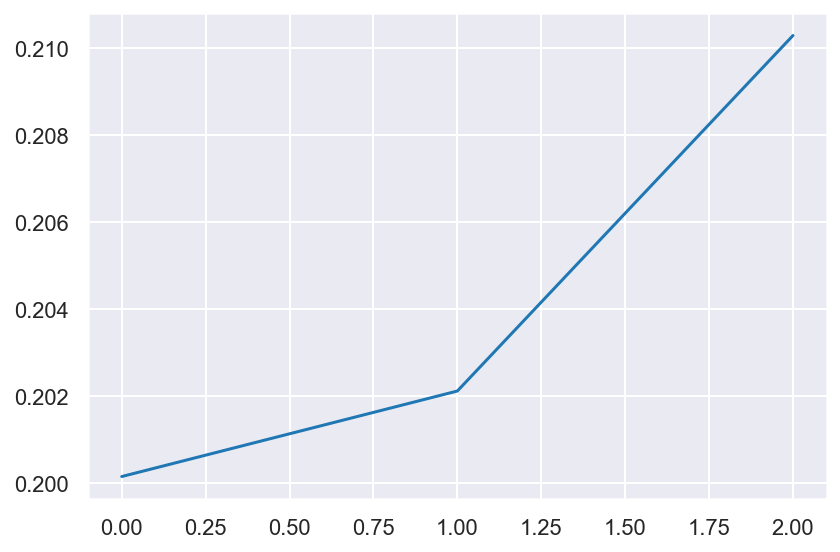

In [36]:
plt.plot(score_list)

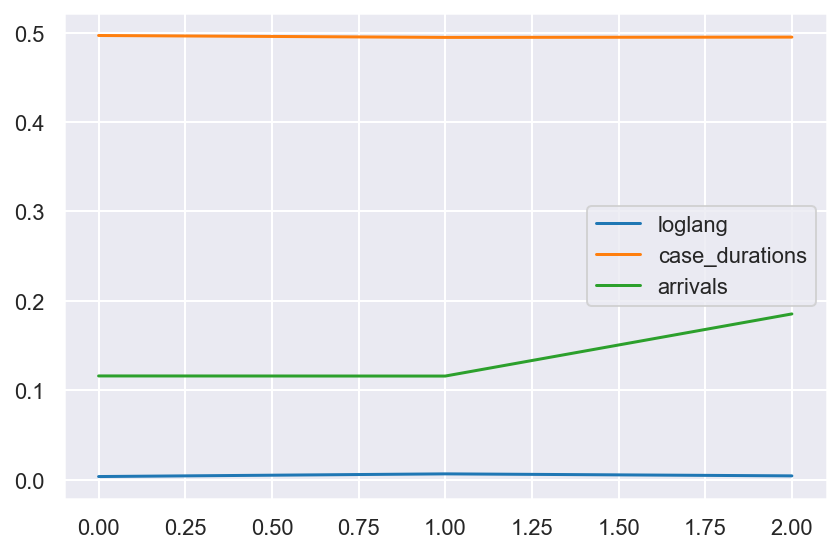

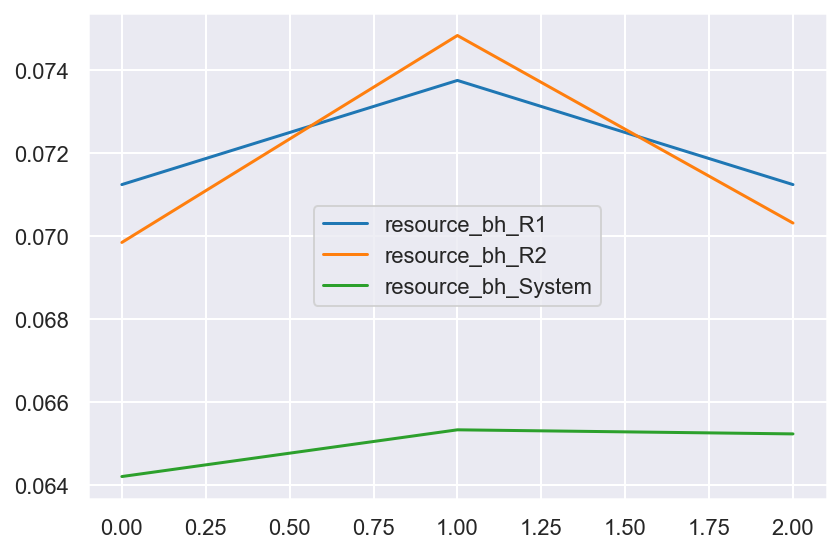

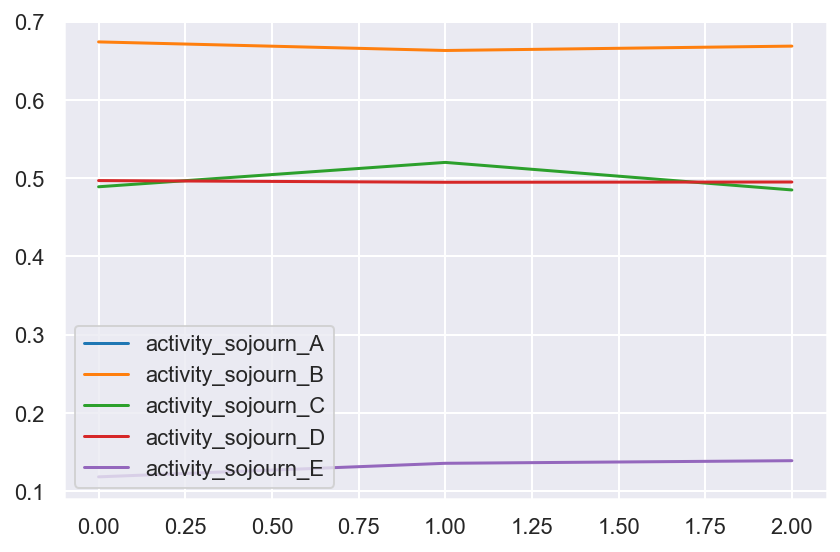

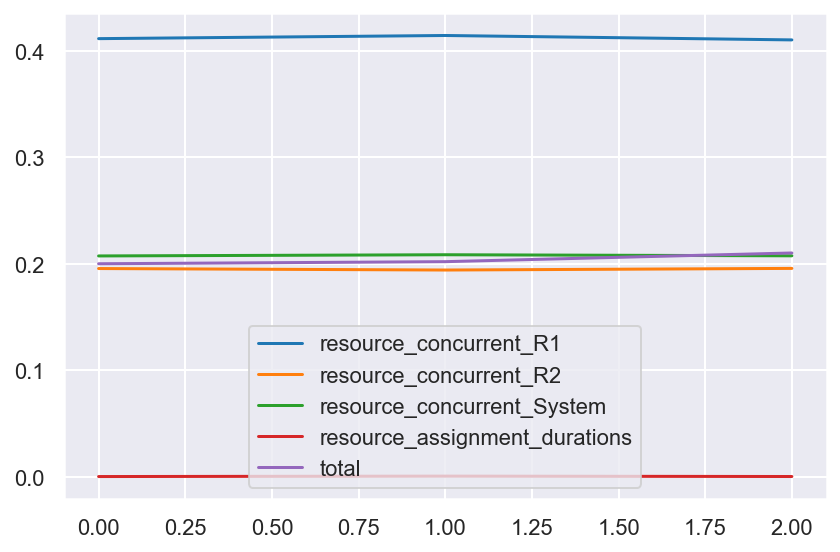

In [37]:
for k, vs in individual_score_lists.items():
    if isinstance(vs, dict):
        plt.legend()
        plt.show()
        for kk, vss in vs.items():
            plt.plot(vss, label=k + '_' + kk)
    else:
        plt.plot(vs, label=k)
plt.legend()
plt.show()

In [38]:
print('final score', score)
print(hyper_parameters)
print(model_configuration)
print(simulated_log)

final score 0.20015637665707806
ModelingAssumptions(activity_assumptions={'A': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'B': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'C': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'D': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2)), 'E': ActivityAssumptions(delay_guess=RelativeFractionalGuess(fraction=0.0), processing_guess=AbsoluteQuantileGuess(quantile=0.2))}, resource_assumptions={'R1': ResourceAssumptions(), 'R2': ResourceAssumptions(), 'System': ResourceAssumptions()}, load_factor=1.0)
Arrivals:
default: ArrivalProcessConfig(first_arrival=2021-04-19 09:08:00+00:00, inter_arrivals=EmpiricalSampler(percentiles=[numpy.timedel

In [39]:
sim.log_similarity.visual_loglang_emd(log, simulated_log)

#lang1	#lang2	variant
48.90%	48.30%	('A-complete', 'C-complete', 'D-complete', 'E-complete')
0.10%	0.00%	('A-complete', 'D-complete', 'C-complete', 'E-complete')
0.30%	0.00%	('A-complete', 'D-complete', 'B-complete', 'E-complete')
50.70%	51.70%	('A-complete', 'B-complete', 'D-complete', 'E-complete')
loglang emd: 0.0035000000000000022


0.0035000000000000022

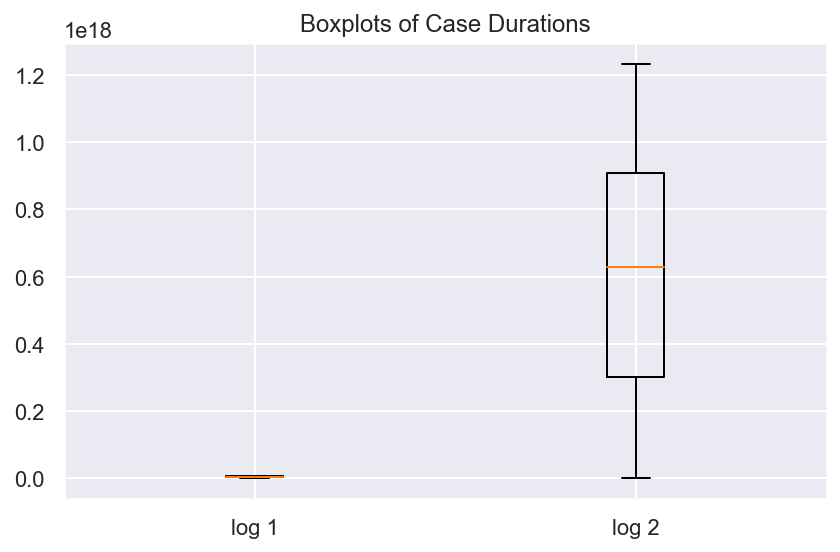

log 1
count                          1000
mean        40 days 01:41:23.520000
std      23 days 09:12:40.540002107
min                 0 days 00:59:00
25%                20 days 00:34:00
50%                41 days 05:29:00
75%                58 days 19:44:30
max                79 days 12:21:00
dtype: object
log 2
count                             1000
mean      7131 days 04:15:53.487439488
std       4143 days 01:47:28.495732224
min             8 days 00:02:02.066215
25%       3486 days 18:01:03.862189824
50%       7274 days 04:31:18.705739008
75%      10520 days 10:46:55.385373056
max      14273 days 06:49:49.012745098
dtype: object
case_duration_emd: 0.49681119993960354


In [40]:
sim.log_similarity.visual_case_duration_emd(log, simulated_log)

In [41]:
simulation_graph1, replay_data1 = sim.fitting.pre_process_input(log, petrinet_model)
simulation_graph2, replay_data2 = sim.fitting.pre_process_input(simulated_log, petrinet_model)

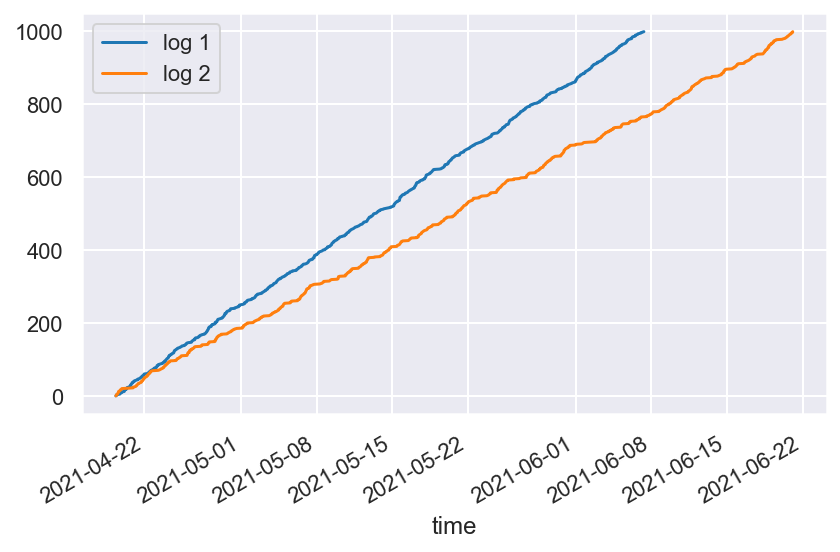

arrivals emd: 0.11602630115990284


In [42]:
sim.log_similarity.visual_arrivals(replay_data1, replay_data2)

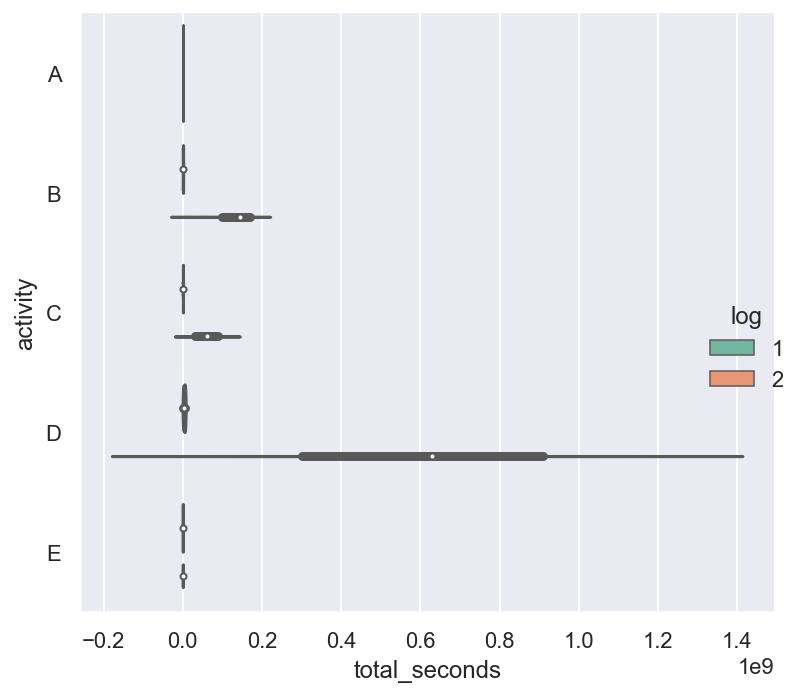

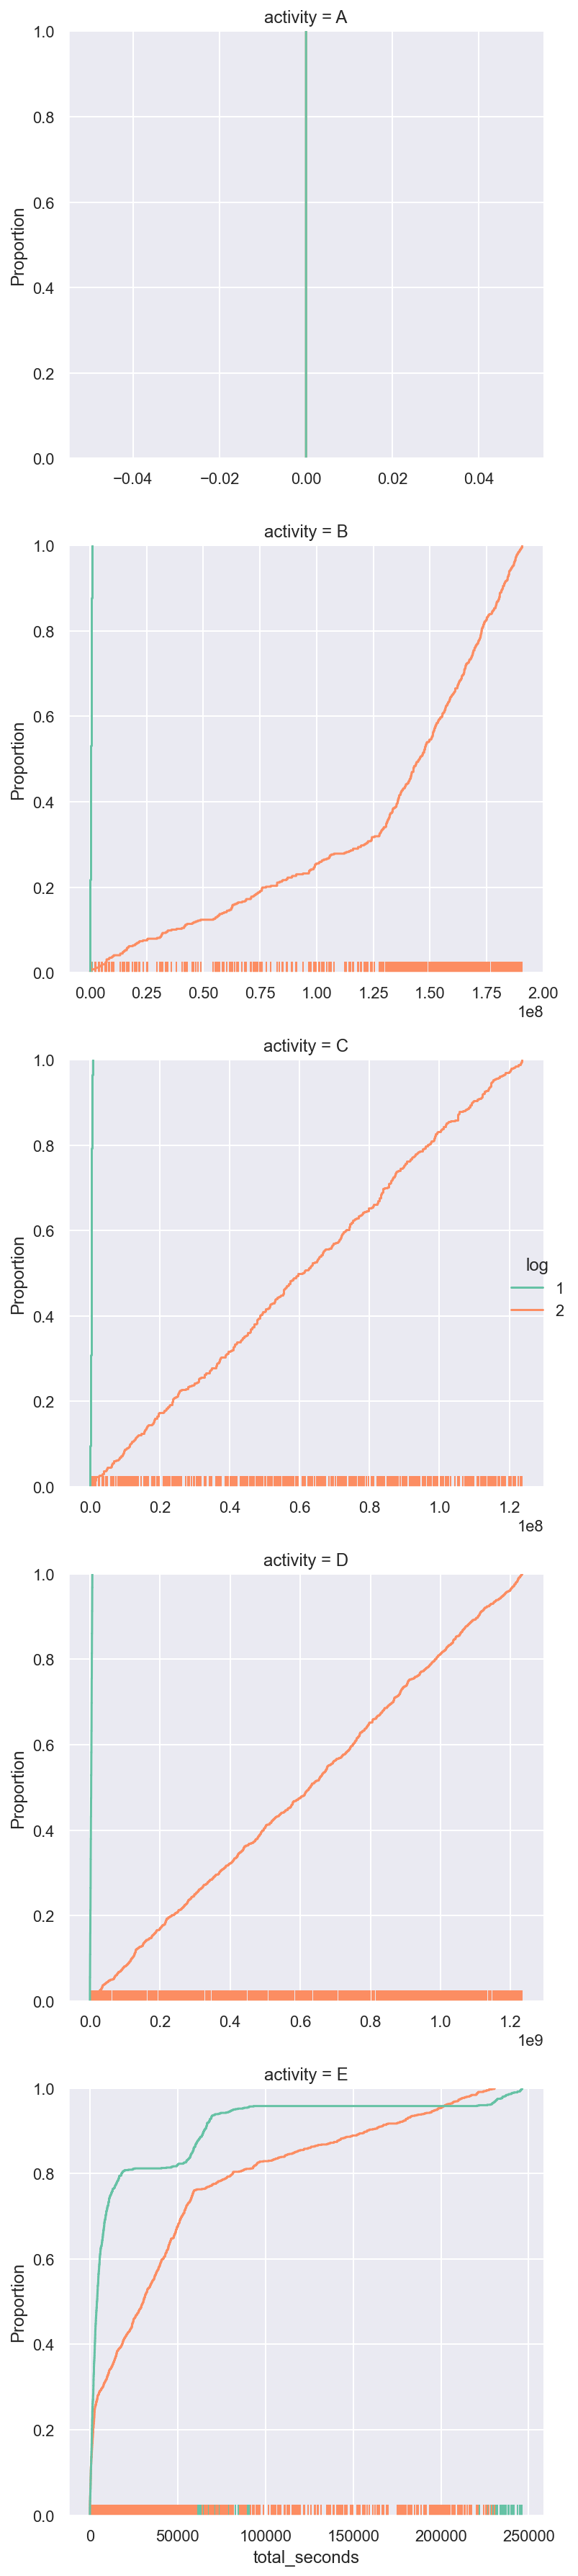

sojourn durations emd of activity A: nan
sojourn durations emd of activity B: 0.6740258509106614
sojourn durations emd of activity C: 0.488899567227568
sojourn durations emd of activity D: 0.4968170732011678
sojourn durations emd of activity E: 0.11822969388554255


In [43]:
sim.log_similarity.visual_sojourn_durations(replay_data1, replay_data2, by='activity')

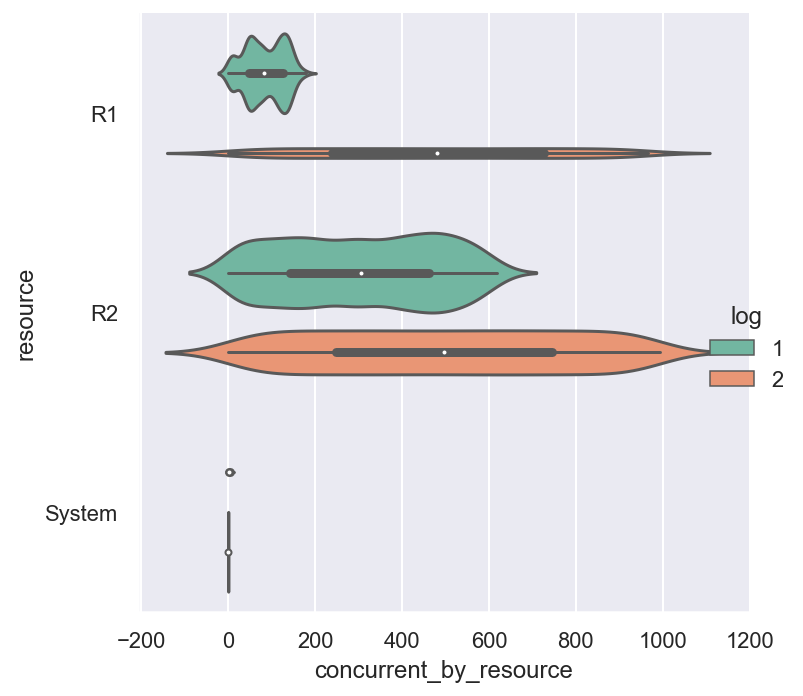

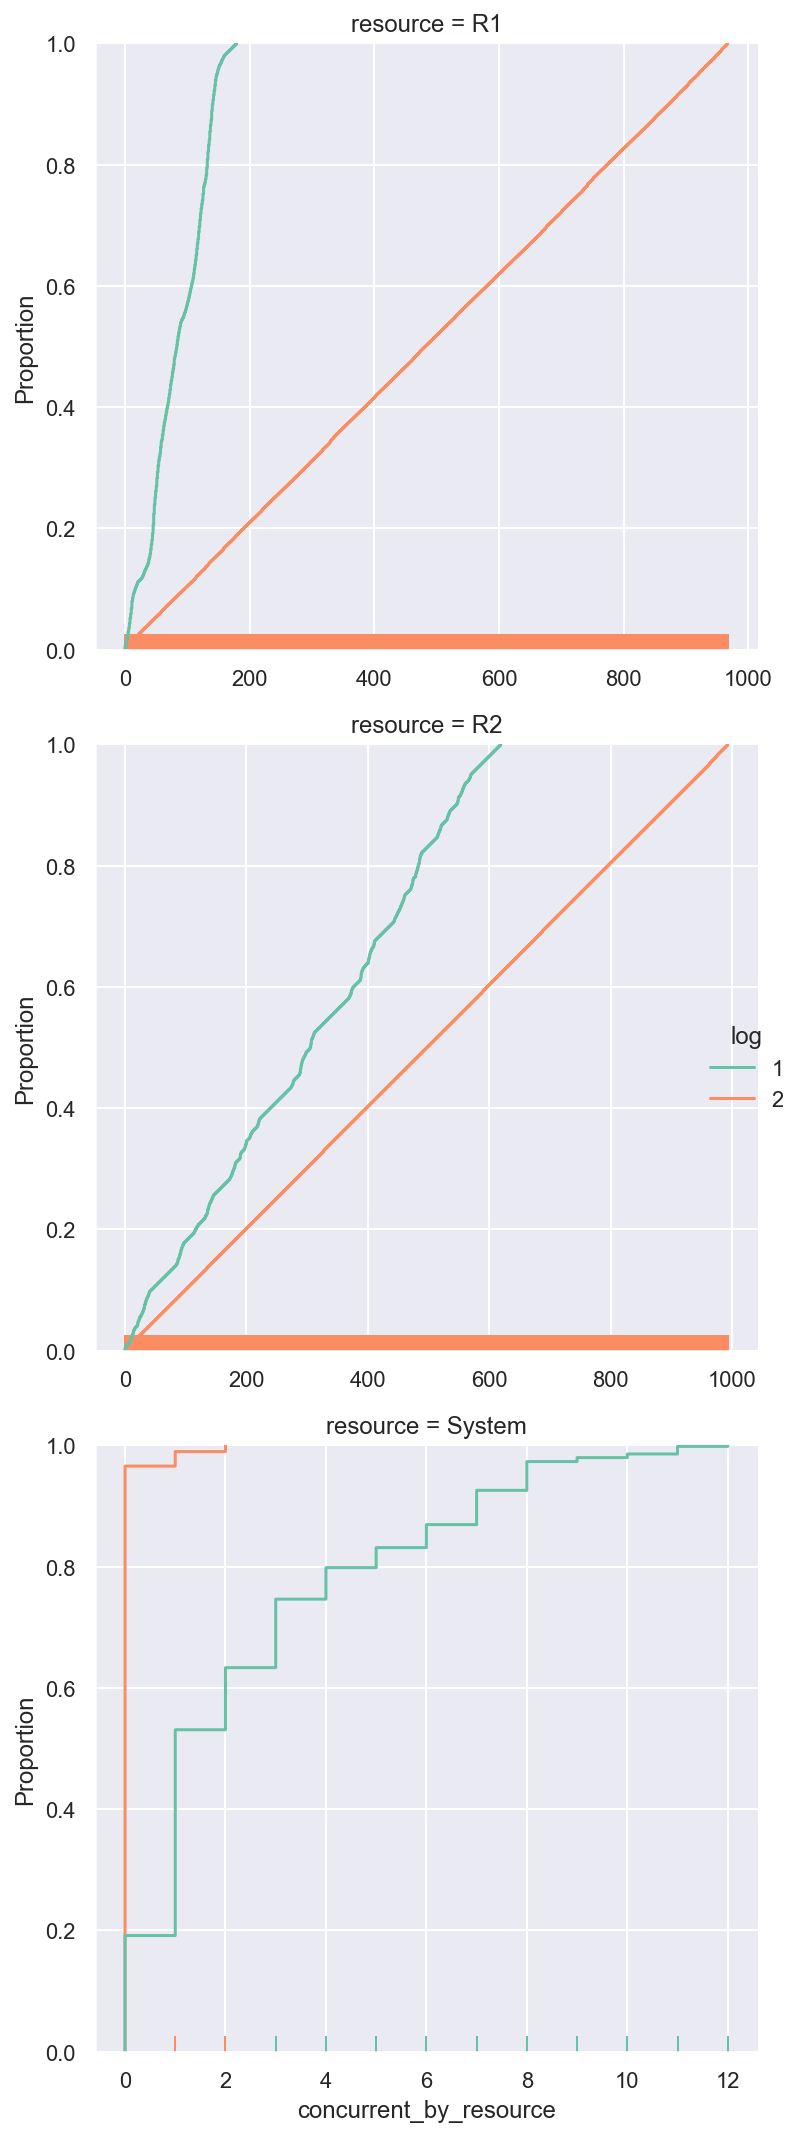

concurrent on completion emd by resource R1: 0.4116566701137539
concurrent on completion emd by resource R2: 0.19565861027190334
concurrent on completion emd by resource System: 0.20749999999999996


In [44]:
sim.log_similarity.visual_concurrent_on_completion(replay_data1, replay_data2, by='resource')

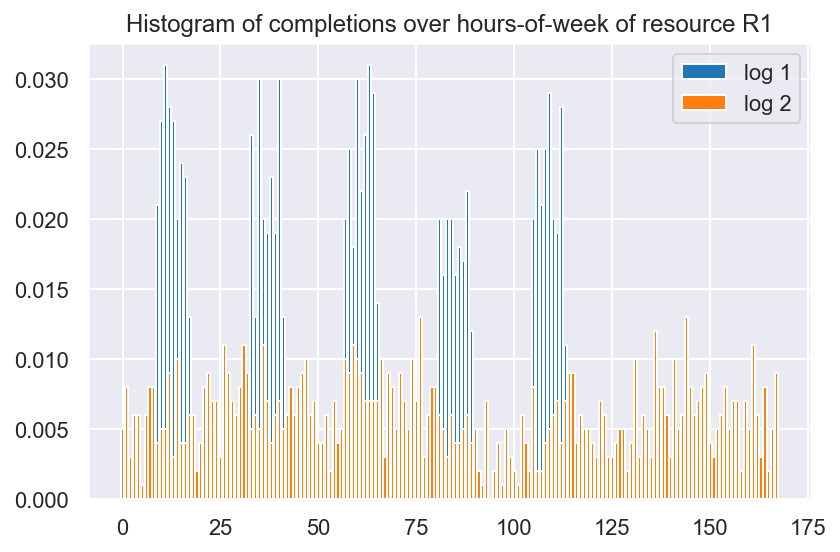

normalized modulo emd for R1: 0.07123637976810289


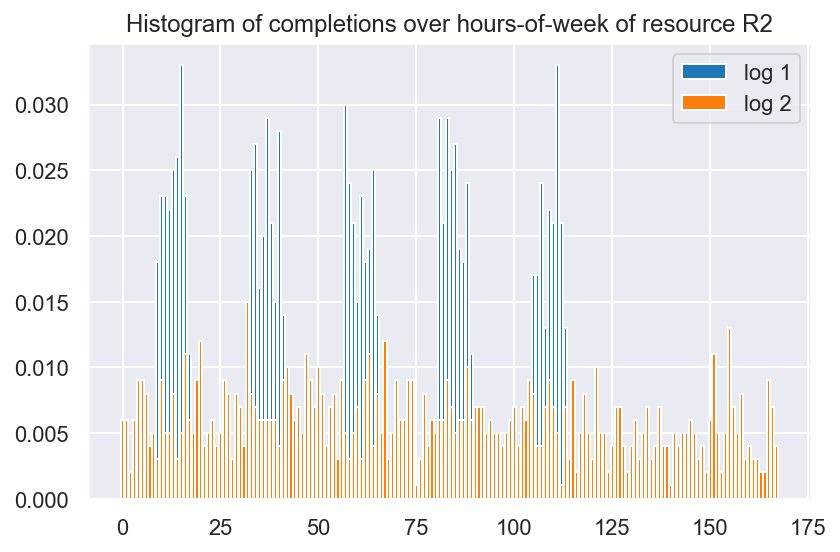

normalized modulo emd for R2: 0.069841335317628


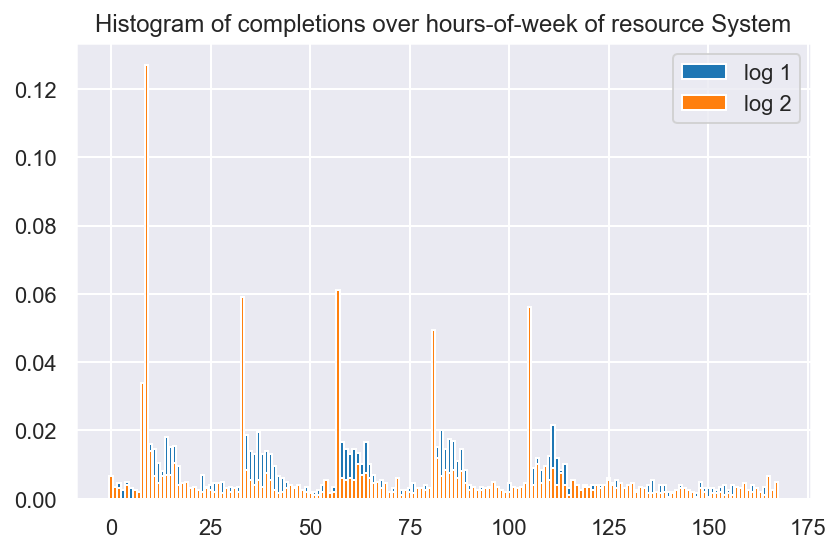

normalized modulo emd for System: 0.06419927211002797


In [45]:
sim.log_similarity.visual_completions_bh(replay_data1, replay_data2, by='resource')

In [46]:
df = replay_data1.trace_tracker.measurements_df
df_simulated = replay_data2.trace_tracker.measurements_df